# TTK4225 Assignment 2

### Note

Some of the points below may be either solved by pen and paper, or -- for who feels brave but also learn something that will be very useful in your theses -- via symbolic computing (e.g., sympy: https://docs.sympy.org/latest/tutorials/intro-tutorial/solvers.html).

The most important thing in this assignment is to understand the logics behind each procedural step you take. Thus for the teachers it does not matter which way you choose, the important is that you understand what you do.

### Introduction

Consider a Lotka Volterra system with inputs, i.e., a system defined by:
- the state variables $y_{prey}$ (preys) and $y_{pred}$ (predators),
- the inputs $u_{prey}$ (human intervention on the preys population) and $u_{pred}$ (human intervention on the predators population),
- the dynamics
$$
    \biggl \{
        \begin{align}
            \dot{y}_{prey} &= \alpha y_{prey} - \beta y_{prey} y_{pred} - u_{prey} \\
            \dot{y}_{pred} &= - \gamma y_{pred} + \delta y_{prey} y_{pred} - u_{pred}
        \end{align}
$$

### Question 1

Observing these two species of animals in the forests, you note that when there is no food around, the amount of time it takes for the predators to decrease their population of a factor $e$ is 3 time units.

Compute then that $\gamma$ for which the time constant of the extintion rate of the predators (i.e., the dynamics of the predators under no-preys assumptions) is 3 time units.

* If you are solving this point via pen and paper, then write the procedure you followed to compute the solution in the cell below, using it as a ```markdown``` cell, and the solution itself.
* If you are solving this point via symbolic computing, then use the cell below as a ```code``` cell to write the code that computes the solution.

For there to be no food around for the predators, the existence of prey must be zero, thus we can compute soley for $\dot{y}_{pred} = -\gamma y_{pred}$.A reduction of population whoose reduction is noted by a factor $e = 3$ time units, describes a population rate of change by $\gamma = \tfrac{1}{3}$. Mathematically:

\begin{gather*}
    y_{pred} &= e^{-\tfrac{1}{3}t}
    \\
    \tfrac{dy_{pred}}{dt}(ln(y_{pred})) &= -\tfrac{1}{3}t
    \\
    \dot{y}_{pred} &= -\tfrac{1}{3} y_{pred} 
\end{gather*}

### Question 2

You also noted that when there is nobody eating them around, the amount of time required for the preys to increase their population of a factor $e$  is 5 time units.

Compute then that $\alpha$ for which the time constant of the Malthusian growth of the preys (i.e., the dynamics of the preys under no-predators assumptions) is 5 time units.

* If you are solving this point via pen and paper, then write the procedure you followed to compute the solution in the cell below, using it as a ```markdown``` cell, and the solution itself.
* If you are solving this point via symbolic computing, then use the cell below as a ```code``` cell to write the code that computes the solution.

Without the existence of predators we can compute soley for $\dot{y}_{prey} = \alpha y_{prey}$.A increase of population whoose increase is noted by a factor $e = 5$ time units, describes a population rate of change by $\alpha = \tfrac{1}{5}$. Mathematically:

\begin{gather*}
    y_{prey} &= e^{\tfrac{1}{5}t}
    \\
    \tfrac{dy_{prey}}{dt}(ln(y_{prey})) &= \tfrac{1}{5}t
    \\
    \dot{y}_{prey} &= \tfrac{1}{5} y_{prey} 
\end{gather*}

### Question 3

You also noted that when nobody poaches these animals, the system seems to be in equilibrium if there are 10 units of preys and 2 units of predators.

Compute then that $\beta$ and $\delta$ so that the system is in equilibrium if there are 10 units of preys and 2 units of predators, and both the $u$'s are set to 0. Obviously let $\alpha$ and $\gamma$ be that ones you computed above.

* If you are solving this point via pen and paper, then write the procedure you followed to compute the solution in the cell below, using it as a ```markdown``` cell, and the solution itself.
* If you are solving this point via symbolic computing, then use the cell below as a ```code``` cell to write the code that computes the solution.

At equilibrium we get that $dot{y}_{prey} = 0$ and  $dot{y}_{pred} = 0$, while $y_{prey} = 10$ and  $y_{pred} = 2$, which results in the following computations for $\beta$ and $\delta$,

\begin{gather}
0 = \tfrac{10}{5} - \beta \cdot 10 \cdot 2 \rightarrow \beta = \tfrac{1}{10} \\
0 = -\tfrac{2}{3} + \delta \cdot 10 \cdot 2 \rightarrow \delta = \tfrac{1}{30} 
\end{gather}

[(3.43223563716998, -0.913552872566004), (14.5677643628300, 1.31355287256600)]
[(5.00000000000000, 0.0), (10.0000000000000, 1.00000000000000)]


### Question 4

Somebody in the government says that we need to control these two populations, and there is thus the need to decides how much human intervention there should be. The government is thinking at two strategies, i.e.:
* **strategy a**: set $u_{prey} = 1$ and $u_{pred} = 0.2$;
* **strategy b**: set $u_{prey} = 1$ and $u_{pred} = 0$.

To help the government, compute and compare the two equilibria that would result by using these two different intervention levels.

* If you are solving this point via pen and paper, then write the procedure you followed to compute the solution in the cell below, using it as a ```markdown``` cell, and the solution itself.
* If you are solving this point via symbolic computing, then use the cell below as a ```code``` cell to write the code that computes the solution.

In [59]:
import sympy as sp
import control as ct

x, y = sp.symbols("x y")


alpha = 1/5
beta = 1/10
gamma = 1/3
delta = 1/30

u1 = 1
u2 = 1/5

dotx = alpha * x - beta * x*y - u1
doty = -gamma * y + delta * x *y - u2

arr = sp.solve((dotx, doty),(x, y))

u1 = 1
u2 = 0

dotx = alpha * x - beta * x*y - u1
doty = -gamma * y + delta * x *y - u2

arr1 = sp.solve((dotx, doty),(x, y))

print(arr)
print(arr1)

print("If the government requires there to be a very specific amount of animals, then strategy b is the only one with \"whole\" number of animals being the equilibria")

[(3.43223563716998, -0.913552872566004), (14.5677643628300, 1.31355287256600)]
[(5.00000000000000, 0.0), (10.0000000000000, 1.00000000000000)]
If the government requires there to be a very specific amount of animals, then strategy b is the only one with "whole" number of animals being the equilibria


### Question 5

You are worried that computing the equilibria is not enough to take a good decision, and you want to help the government by coding a simulator that can be used to draw predictions of how the population levels will change in time, depending on the interventions that humans may want to take in the future (and thus the $u$ signals in time). 

Code thus an Euler solver that computes the trajectories of the model, and plot the corresponding results, starting from generic initial conditions, and considering generic actuation signals $u$. Add as many cells you like to organize your code.

Tip: use as a starting point the code you find in https://github.com/damianovar/TTK4225-2023.

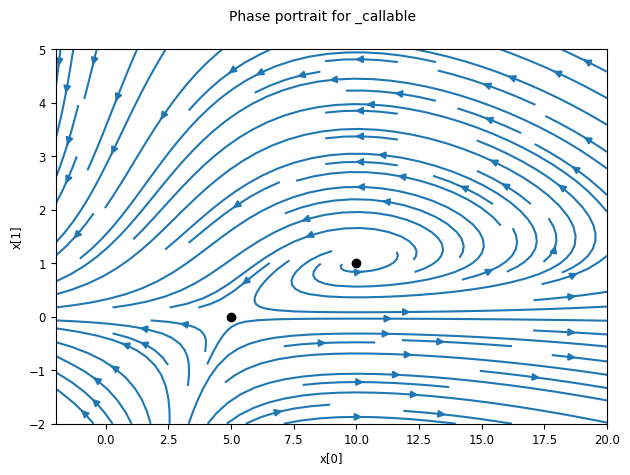

In [ ]:
alpha = 1/5
beta = 1/10
gamma = 1/3
delta = 1/30

def volta1(t, x, params = None):
    u1 = 1
    u2 = 0
    x1, x2 = x
    return [alpha * x1 - beta * x1*x2 - u1,-gamma * x2 + delta * x1 *x2 - u2]

ax = ct.phase_plane_plot(
    volta1,
    pointdata=[-2, 20, -2, 5],
    gridspec=[25, 25],
    timedata=4,
    plot_streamplot=True,
    plot_equilpoints=True,
    plot_separatrices=False
)

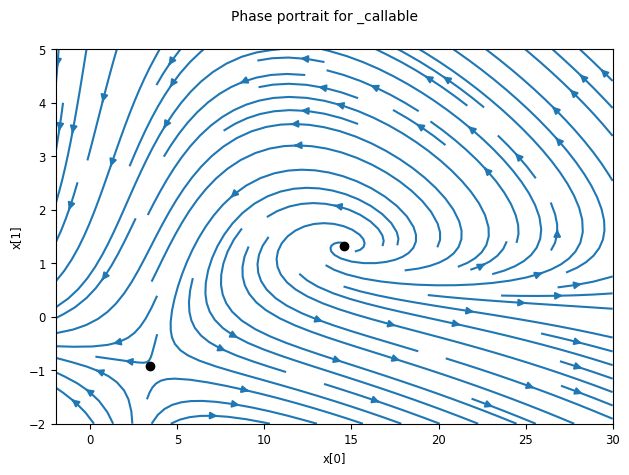

In [48]:
alpha = 1/5
beta = 1/10
gamma = 1/3
delta = 1/30

def volta1(t, x, params = None):
    u1 = 1
    u2 = 1/5
    x1, x2 = x
    return [alpha * x1 - beta * x1*x2 - u1,-gamma * x2 + delta * x1 *x2 - u2]

ax = ct.phase_plane_plot(
    volta1,
    pointdata=[-2, 30, -2, 5],
    gridspec=[25, 25],
    timedata=4,
    plot_streamplot=True,
    plot_equilpoints=True,
    plot_separatrices=False
)

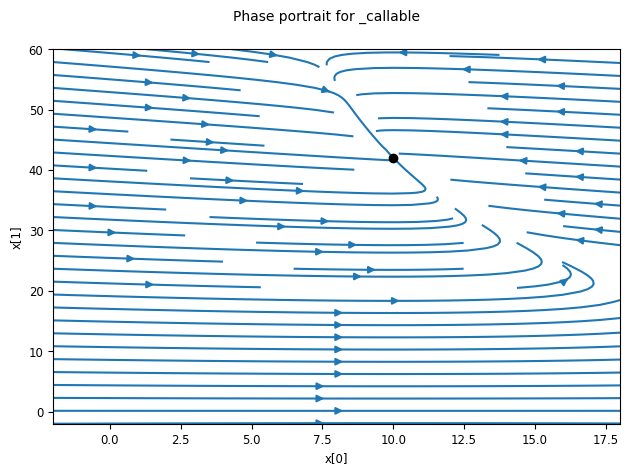

In [ ]:
alpha = 1/5
beta = 1/10
gamma = 1/3
delta = 1/30

r1, r2 = 50.0, 10.0     
Kp1, Kp2 = 1.0, 0.0   
w = 1 #disaster disturbance

# P regulator 
def volta1(t, x, params=None):
    x1, x2 = x
    u1 = -Kp1 * (r1 - x1) - w      
    u2 = Kp2 * (r2 - x2) - w
    dx1 = alpha*x1 - beta*x1*x2 - u1
    dx2 = -gamma*x2 + delta*x1*x2 - u2
    return [dx1, dx2]

ax = ct.phase_plane_plot(
    volta1,
    pointdata=[-2, 18, -2, 60],
    gridspec=[25, 25],
    timedata=4,
    plot_streamplot=True,
    plot_equilpoints=True,
    plot_separatrices=False
)

From the phase portraits we can see that with strategy **a** and **b** any external disturbance like an animal pandemic or an environment distaster can easly elminate either or both populations. If the government however implements an P controller and fine tune it, they can make the controller more robust for such environemnts

### Question 6

Argh, covid is hitting the predators too! You need to modify your simulator if you want to be able to compute meaningful forecasts. For this, create another version of the ODEs defining your simulator (i.e., assuming you are using names similar to the ones in the github repository above, create another version of the ```myModel``` function) so that between time $T_{1} = 10$ and $T_{2} = 11$ the pandemic event affects the predators so that, during that period, their deaths rate $\gamma$ is twice its original value.

Tip: always give meaningful names to the variables and functions you code.

### Question 7

To see if this pandemic actually affects the populations a lot or not, you need to compare the two versions of the ODEs, i.e., compute and plot opportunely some trajectories using the original dynamics and some trajectories using the "pandemic-affected" ones.

To aid interpretability, you decide to do five different simulations starting from the 5 different initial conditions, each defined by $y(0) = (1+0.1k)y_{eq,u}$ with $k = 1,...,5$., always using **strategy a** as an intervention.

Create in the cell below (or in as many cells you need) some code that produces 5 plots, one for each initial condition, and each divided in 2 parts:
* on the left, the two trajectories (original vs. pandemic) in the phase space,
* on the right, the two trajectories (original vs. pandemic) as time signals.

Tip: do so that the axes across the 5 figures of the same type are identical (e.g., the ```x_axis_max``` of the various phase portraits are the same).

### Question 8

How much do you think the pandemic affects this ecological system? Write your thoughts in the cell below, using it as a ```markdown``` cell.